# Application: Stellar Structure

During most of their lifetimes, stars are in hydrostatic and thermal equilibrium, and the structure of a star is well-described by the equations of stellar structure:

\begin{align*}
\frac{dP}{dr} &= -\rho \frac{Gm}{r^2} \\
\frac{dm}{dr} &= 4\pi r^2 \rho \\
\frac{dT}{dr} &= -\frac{3}{4ac} \frac{\kappa\rho}{T^3} \frac{F}{4\pi r^2} \\
\frac{dF}{dr} &= 4\pi r^2 \rho q
\end{align*}

with an equation of state, opacity, and energy generation rate of the form:

\begin{align*}
P &= \frac{\rho k T}{\mu_I m_u} + P_e + \frac{1}{3} a T^4 \\
\kappa &= \kappa(\rho, T, \{X_k\}) \\
q &= q(\rho, T, \{X_k\})
\end{align*}

Here, $P$ is the pressure, $m$ is the mass enclosed inside a radius $r$, $T$ is the temperature, where we assume radiative equilibrium with $F$ describing an energy flux through a shell of radius $r$ and $\kappa$ the opacity of the material, which depends on density, temperature, and composition, $\{X_k\}$ (mass fractions).  Finally $q$ is the energy generation rate from nuclear processes.  

To solve these, we specify the mass of the star, $M_\star$, and the composition in the interior, $\{X_k\}$.
This is a 2-point boundary value problem, with boundary conditions:

\begin{align*}
r(m=0) &= 0 \\
F(m=0) &= 0
\end{align*}

at the center and

\begin{align*}
P(m=M_\star) &= 0 \\
T(m=M_\star) &= T_\mathrm{eff} 
\end{align*}

at the surface.

We'll look at a simplified model here.

## Polytropes

If we consider just the first 2 equations, hydrostatic equilibrium and mass continuity, we can close the system of equations if we have an equation of state of the form $P = P(\rho)$.  This eliminates the need for the energy equations, simplifying the model and its solution.

We'll assume an equation of state of the form:

$$P = K \rho^{1+1/n}$$

where $n$ is called the _polytropic index_.



With a bit of algebra, we can combine these equations into a single second-order ODE for density:

$$\left ( \frac{n+1}{n} \right ) \frac{K}{4\pi G} \frac{1}{r^2} \frac{d}{dr} \left ( \frac{r^2}{\rho^{(n-1)/n}} \frac{d\rho}{dr} \right ) = -\rho$$

and then make it dimensionless, but expressing the density in terms of the central density, $\rho_c$:

$$\rho(r) = \rho_c \theta^n(r)$$

where we note that $0 \le \theta \le 1$, and a lenghtscale $\alpha$ such that $r = \alpha \xi$:

$$\alpha^2 = \frac{(n+1)P_c}{4\pi G\rho_c^2}$$

Giving

$$\frac{1}{\xi^2}\frac{d}{d\xi} \left ( \xi^2 \frac{d\theta}{d\xi} \right ) = -\theta^n$$

The boundary conditions are:

* $\theta(\xi=0) = 1$
* $d\theta / d\xi |_{\xi=0} = 0$ ($g = 0$ at the center, so $dP/dr = d\rho/dr = 0$)

but we don't know where the surface lies.  It is defined as $\xi_1$ as:

$$\xi_1 : \, \theta(\xi_1) = 0$$

This is called the [Lane-Emden equation](https://en.wikipedia.org/wiki/Lane%E2%80%93Emden_equation), and it has analytic solutions for $n = 0, 1, 5$.

Once you have the solution, you can get back physical quantities, including the mass of the star, the central pressure, average density, etc.  For example, the mass is related to the solution as:

$$M_\star = -4\pi \alpha^3 \rho_c  \left . {\xi_1}^2 \left (\frac{d\theta}{d\xi} \right ) \right |_{\xi=\xi_1}$$


A large number of [stellar systems are well-represented by polytropes](https://en.wikipedia.org/wiki/Polytrope#Example_models_by_polytropic_index).



## Solving the Lane-Emden equation

There are a variety of ways to solve this equation.

We could just integrate from $\xi = 0$ and keep integrating until the solution goes negative.  If we make the stepsize small at the end, then we can identify $\xi_1$ as the location where $\theta(\xi) < 0$.

However, we are going to take an approach built on the shooting example we just saw.  This is because the full system of the 4 stellar structure equations needs a method like this, so we'd like to understand it based on the Lane-Emden equation.

We'll use 4th order RK integration and we'll integrate both inward from the surface and outward from the center and meet at some point in the middle, $\xi_\mathrm{fit}$.

We rewrite our system by defining:

\begin{align*}
y &= \theta \\
z &= d\theta/d\xi = dy/d\xi
\end{align*}

then our system is:

\begin{align*}
\frac{dy}{d\xi} &= z \\
\frac{dz}{d\xi} &= -y^n - \frac{2}{\xi} z
\end{align*}

At $\xi = 0$, the righthand side of $dz/d\xi$ looks like it blows up, but in the limit $\xi \rightarrow 0$, the solution takes the form:

$$\theta(\xi) = 1 - \frac{1}{6}\xi^2 + \frac{n}{120} \xi^4 + \ldots$$

which allows us to simply the $dz/d\xi$ near $\xi = 0$ as:

$$\frac{dz}{d\xi} \approx -\frac{1}{3}$$

We're going to integrate outward from the center and inward from the surface and meet in the middle.

At the center, our boundary conditions are:

* $y(0) = 1$
* $z(0) = 0$

and at the surface, $\xi_s$, they are:

* $y(\xi_s) = 0$
* $z(\xi_s) = \eta$

Initially, we don't know either $\eta$ or $\xi_s$.

Our algorithm will proceed as follows:

* Take an initial guess for $\eta$ and $\xi_s$.  Pick $\xi_f = \xi_s/2$.

* Integrate from the center outward to the fit point, $\xi_f$, getting the solution: $y_\mathrm{out}(\xi_f)$, $z_\mathrm{out}(\xi_f)$.

* Integrate from the surface (starting at the guess $\xi_s$ inward to the fit point, getting the
solution $y_\mathrm{in}(\xi_f)$, $z_\mathrm{in}(\xi_f)$

* Constrain the solution to match at the fit point by finding the zero of:

  \begin{align*}
  Y(\eta, \xi_s) &\equiv y_\mathrm{in}(\xi_f) - y_\mathrm{out}(\xi_f) = 0 \\
  Z(\eta, \xi_s) &\equiv z_\mathrm{in}(\xi_f) - z_\mathrm{out}(\xi_f) = 0
  \end{align*}
  
  we will do this via the secant method.  This will yield a new guess for $\eta$ and $\xi_s$.
  
* Iterate over this procedure until the $\eta$ and $\xi_s$ converge.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [2]:
def rhs(xi, H, n):
    
    y = H[0]
    z = H[1]

    f0 = z

    if xi == 0.0:
        f1 = 2.0/3.0 - y**n
    else:
        f1 = -2.0*z/xi - y**n

    return np.array([f0, f1])

We'll use SciPy's implementation of 4th order Runge-Kutta here

In [3]:
def le_integrate(xi_start, xi_end, H0, n):

    sol = solve_ivp(rhs, (xi_start, xi_end), H0,
                    method="RK45", rtol=1.e-8, atol=1.e-8, args=(n,))

    xi = sol.t
    y = sol.y[0, :]
    z = sol.y[1, :]

    return xi, y, z

Now, we still need to understand how to solve for 2 roots from 2 equations (so far, we've only done the scalar case).

Let's Taylor expand our functions $Y$ and $Z$:

\begin{align*}
Y(\eta +\Delta \eta, \xi_s + \Delta \xi_s) &= Y(\eta, \xi_s) + \frac{\partial Y}{\partial \eta} \Delta \eta + \frac{\partial Y}{\partial \xi_s} \Delta \xi_s \sim 0 \\
Z(\eta +\Delta \eta, \xi_s + \Delta \xi_s) &= Z(\eta, \xi_s) + \frac{\partial Z}{\partial \eta} \Delta \eta + \frac{\partial Z}{\partial \xi_s} \Delta \xi_s \sim 0 
\end{align*}

We want to solve for the corrections, $\Delta \eta$ and $\Delta \xi_s$ that zero this&mdash;this is Newton's method, but now for a system of equations.

We can solve the first equation for $\Delta \eta$:

$$\Delta \eta = \left ( \frac{\partial Y}{\partial\eta} \right )^{-1} \left [ \frac{\partial Y}{\partial \xi_s} \Delta \xi_s - Y \right ]$$

and then substitute this into the second equation and solve for $\Delta \xi_s$:

$$\Delta \xi_s = \frac{-Z + \frac{\partial Z}{\partial \eta} \left ( \frac{\partial Y}{\partial \eta} \right )^{-1} Y}{\frac{\partial Z}{\partial \xi_s} + \frac{\partial Z}{\partial \eta} \left ( \frac{\partial Y}{\partial \eta} \right)^{-1} \frac{\partial Y}{\partial \xi_s}}$$

We still need the derivatives, which we will compute via differencing.

For systems with more than 2 equations and 2 unknowns, it becomes tedious to analytically solve for the corrections.  Instead, as we'll see shortly, we can express this as a linear system and solve for the corrections using numerical linear algebra methods.

In [21]:
def solve_le(n):

    # initial guesses for the unknowns -- if we aren't careful with the
    # guess at the outer boundary, we can get 2 roots.  Here we know that
    # n = 1 has xi_s = pi

    if n > 2.0:
        xi_s = 8.0
    else:
        xi_s = np.pi

    eta = -0.01

    # for numerical differentiation
    eps = 1.e-8

    # main iteration loop
    converged = False
    while not converged:

        # fitting point
        xi_fit = xi_s / 2.0

        # baseline integration

        # outward from the center
        xi_out, y_out, z_out = le_integrate(0.0, xi_fit, [1.0, 0.0], n)

        # inward from xi_s
        xi_in, y_in, z_in = le_integrate(xi_s, xi_fit, [0.0, eta], n)

        # the two functions we want to zero
        Ybase = y_in[-1] - y_out[-1]
        Zbase = z_in[-1] - z_out[-1]

        # now do eta + eps*eta, xi_s
        # inward from xi_s
        H0 = np.array([0.0, eta*(1.0+eps)])
        xi_in, y_in, z_in = le_integrate(xi_s, xi_fit, [0.0, eta * (1.0 + eps)], n)

        Ya = y_in[-1] - y_out[-1]
        Za = z_in[-1] - z_out[-1]

        # our derivatives
        dYdeta = (Ya - Ybase) / (eta * eps)
        dZdeta = (Za - Zbase) / (eta * eps)

        # now do alpha, xi_s + eps*xi_s
        # inward from xi_s
        xi_in, y_in, z_in = le_integrate(xi_s  * (1.0 + eps), xi_fit, [0.0, eta], n)

        Yxi = y_in[-1] - y_out[-1]
        Zxi = z_in[-1] - z_out[-1]

        # our derivatives
        dYdxi_s = (Yxi - Ybase) / (xi_s * eps)
        dZdxi_s = (Zxi - Zbase) / (xi_s * eps)

        # compute the correction for our two parameters
        dxi_s = - (Zbase - dZdeta * Ybase / dYdeta) / \
                    (dZdxi_s - dZdeta * dYdxi_s / dYdeta)

        deta = -(Ybase + dYdxi_s * dxi_s) / dYdeta

        # limit the changes per iteration
        deta = min(abs(deta), 0.1 * abs(eta)) * np.copysign(1.0, deta)
        dxi_s = min(abs(dxi_s), 0.1 * abs(xi_s)) * np.copysign(1.0, dxi_s)
                    
        print(f"corrections:  {deta:13.10f}, {dxi_s:13.10f}")
        
        eta += deta
        xi_s += dxi_s

        if abs(deta) < eps * abs(eta) and abs(dxi_s) < eps * abs(xi_s):
            converged = True
            
    return xi_in, y_in, z_in, xi_out, y_out, z_out

In [22]:
n = 3
xi_in, y_in, z_in, xi_out, y_out, z_out = solve_le(n)

corrections:  -0.0010000000, -0.8000000000
corrections:  -0.0011000000,  0.1041147613
corrections:  -0.0012100000, -0.4023129572
corrections:  -0.0013310000,  0.6901801804
corrections:  -0.0014641000, -0.7591981985
corrections:  -0.0016105100,  0.6832783786
corrections:  -0.0017715610, -0.7516062165
corrections:  -0.0019487171,  0.6764455948
corrections:  -0.0021435888, -0.7440901543
corrections:  -0.0023579477,  0.6696811389
corrections:  -0.0025937425, -0.6416950043
corrections:  -0.0028531167,  0.5277799831
corrections:  -0.0031384284, -0.4366093478
corrections:  -0.0034522712,  0.1755125576
corrections:  -0.0037974983, -0.0987624438
corrections:  -0.0006486268,  0.0046186327
corrections:  -0.0000086425, -0.0004880733
corrections:  -0.0000000003,  0.0000000612


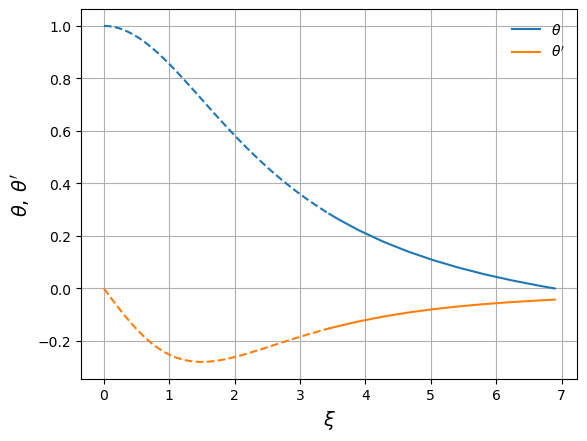

In [23]:
fig, ax = plt.subplots()

ax.plot(xi_in, y_in, color="C0", label=r"$\theta$")
ax.plot(xi_out, y_out, color="C0", ls="--")

ax.plot(xi_in, z_in, color="C1", label=r"$\theta'$")
ax.plot(xi_out, z_out, color="C1", ls="--")

ax.set_xlabel(r"$\xi$", fontsize=14)
ax.set_ylabel(r"$\theta,\, \theta'$", fontsize=14)

ax.legend(frameon=False, loc="best")
ax.grid()

Now we can get the surface of the polytrope, $\xi_1$

In [16]:
xi1 = xi_in[0]
xi1

6.896848900785904

and $\theta^\prime$ at the surface:

In [17]:
dthetadxi_1 = z_in[0]

A common quantity needed in finding physical values is $-\xi_1^2 \theta^\prime |_{\xi=\xi_1}$

In [18]:
-xi1**2 * dthetadxi_1

2.018235801821596